In [5]:
import pandas as pd # imoprt packages
import seaborn
from matplotlib import pyplot

In [6]:
# import data and set labels

data = pd.read_csv('./distance_table_100mfw_0c.txt', sep = ' ')
DISTR_TITLE = 'Distributions of stylometric distances'
DIST_LABEL = 'Leskov and Unknown'

<AxesSubplot:>

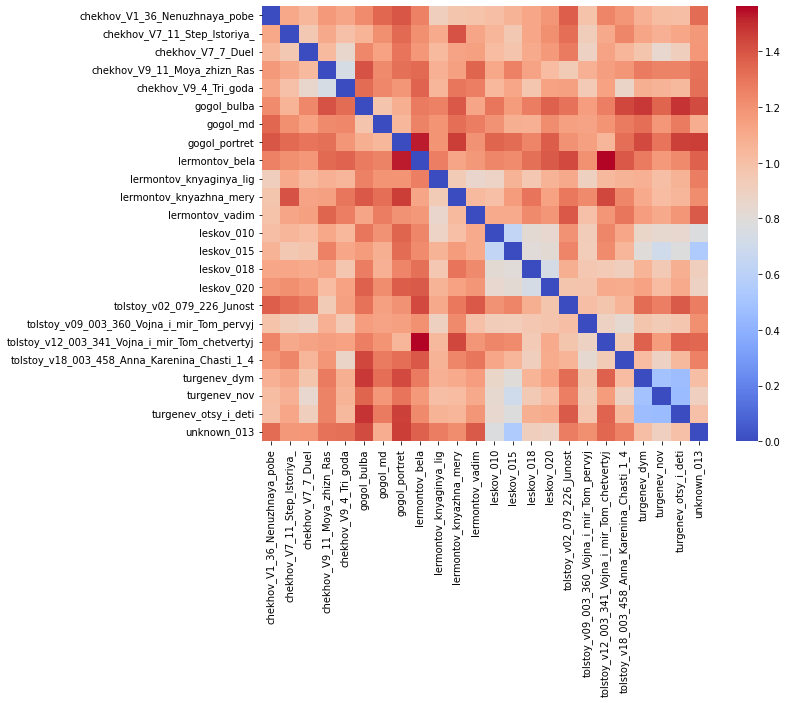

In [7]:
pyplot.figure(figsize=(10,8)) # plotting the heatmap
seaborn.heatmap(data, cmap='coolwarm')

In [8]:
# calculate intertext distanses

def update_pairs_dict(pairs_dict, some_author_name, some_author_distances):
    for index, distance in enumerate(some_author_distances):
        second_author = some_author_distances.index[index]
        pair = tuple(sorted((some_author_name, second_author)))
        if pair not in pairs_dict and distance !=0:
            pairs_dict[pair] = distance

In [9]:
pairs_dict = {}
for some_author_name in data:
    some_author_distances = data[some_author_name]
    update_pairs_dict(pairs_dict, some_author_name, some_author_distances)

def is_same_author(author1, author2):
    name1 = author1.split('_')[0]
    name2 = author2.split('_')[0] 
    return(name1 == name2)

intra_distances = []
inter_distances = []
unknown_distances = []

for pair in pairs_dict:
    distance = pairs_dict[pair]
    author1, author2 = pair
    if is_same_author(author1, author2):
        intra_distances.append(distance)
    elif author1.startswith('leskov') and author2.startswith('unknown'):
        unknown_distances.append(distance)
    else:
        inter_distances.append(distance)

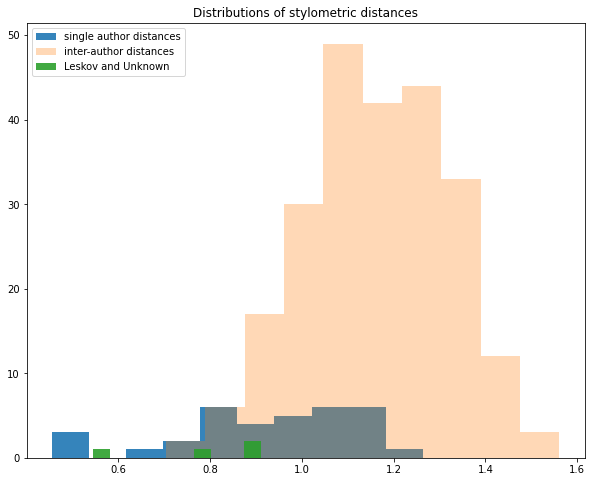

In [11]:
# plotting one more figure

from matplotlib import pyplot
pyplot.figure(figsize=(10, 8))
pyplot.title(DISTR_TITLE)

pyplot.hist(intra_distances, alpha=0.9, label='single author distances')
pyplot.hist(inter_distances, alpha=0.3, label='inter-author distances')
pyplot.hist(unknown_distances, alpha=0.9, label=DIST_LABEL)

pyplot.legend(loc='upper left')
pyplot.show()